#### Importăm modulele necesare:

In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


#### Valorile parametrilor funcției de extragere a datelor:

In [2]:
num_rows = 45
num_columns = 130
num_channels = 1

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 3.0

#### Extragem datele într-un dataframe:

In [3]:
featuresdf = data_load.make_dataframe_class_no(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds)

Finished feature extraction from  970  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

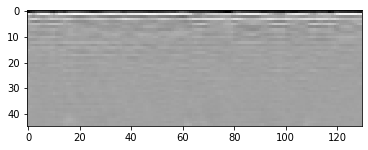

In [5]:
path = 'C:/Users/Maria/Documents/Licenta/Proiect/Dataset/wav/id10001/9mQ11vBs1wc/00004.wav'
render.show_mfccs(path, num_rows, num_columns, num_seconds)

In [6]:
learn.compile(model)

#### Modelul are o acuratețe de aproximativ 5% înainte de antrenament:

In [7]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 129, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 63, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 30, 64)         8

In [8]:
featuresdf

,feature,class_label,class
0,"[[-202.58553, -199.25586, -199.08582, -209.295...",A.J._Buckley,0
1,"[[-115.306145, -126.16454, -150.82576, -156.61...",A.J._Buckley,0
2,"[[-200.25298, -189.63104, -170.79625, -169.586...",A.J._Buckley,0
3,"[[-364.86426, -365.99326, -312.48773, -243.440...",A.J._Buckley,0
4,"[[-180.10895, -186.5982, -191.97629, -180.9856...",A.J._Buckley,0
...,...,...,...
965,"[[-234.07841, -273.76657, -326.95514, -305.263...",Adam_Brody,9
966,"[[-491.7063, -494.57523, -505.03894, -505.7204...",Adam_Brody,9
967,"[[-416.73138, -420.37796, -425.61163, -456.735...",Adam_Brody,9
968,"[[-311.0644, -320.13596, -334.85696, -329.8414...",Adam_Brody,9


#### Antrenăm modelul timp de 100 de epoci:

In [10]:
class_weight = learn.calculate_class_weight(featuresdf)
history = learn.train_model_class_weights(model, result_sets, num_epochs, num_batch_size, 'CNNCw', 'default', 'CNNCw', class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 776 samples, validate on 194 samples
Epoch 1/100
754/776 [============================>.] - ETA: 0s - loss: 26.3201 - accuracy: 0.1313
Epoch 00001: val_loss improved from inf to 10.87594, saving model to saved_models/weights.best.CNNCw.hdf5
776/776 [==============================] - 5s 6ms/sample - loss: 25.9418 - accuracy: 0.1353 - val_loss: 10.8759 - val_accuracy: 0.2423
Epoch 2/100
767/776 [============================>.] - ETA: 0s - loss: 11.0561 - accuracy: 0.2451- E
Epoch 00002: val_loss improved from 10.87594 to 10.04686, saving model to saved_models/weights.best.CNNCw.hdf5
776/776 [==============================] - 4s 5ms/sample - loss: 10.9987 - accuracy: 0.2487 - val_loss: 10.0469 - val_accuracy: 0.3608
Epoch 3/100
767/776 [============================>.] - ETA: 0s - loss: 9.6820 - accuracy: 0.3259
Epoch 00003: val_loss improved from 10.04686 to 9.24712, saving model to saved_models/weights.best.CNNCw.hdf5
776/776 [==

Epoch 26/100
767/776 [============================>.] - ETA: 0s - loss: 3.2695 - accuracy: 0.7771
Epoch 00026: val_loss improved from 3.74039 to 3.54439, saving model to saved_models/weights.best.CNNCw.hdf5
776/776 [==============================] - 4s 6ms/sample - loss: 3.2452 - accuracy: 0.7796 - val_loss: 3.5444 - val_accuracy: 0.7990
Epoch 27/100
767/776 [============================>.] - ETA: 0s - loss: 2.9640 - accuracy: 0.7966
Epoch 00027: val_loss did not improve from 3.54439
776/776 [==============================] - 4s 5ms/sample - loss: 2.9435 - accuracy: 0.7977 - val_loss: 3.5656 - val_accuracy: 0.7680
Epoch 28/100
767/776 [============================>.] - ETA: 0s - loss: 3.0161 - accuracy: 0.7992
Epoch 00028: val_loss improved from 3.54439 to 3.54280, saving model to saved_models/weights.best.CNNCw.hdf5
776/776 [==============================] - 5s 6ms/sample - loss: 3.0409 - accuracy: 0.7990 - val_loss: 3.5428 - val_accuracy: 0.8093
Epoch 29/100
767/776 [================

Epoch 53/100
767/776 [============================>.] - ETA: 0s - loss: 1.5145 - accuracy: 0.9009
Epoch 00053: val_loss did not improve from 2.17090
776/776 [==============================] - 3s 4ms/sample - loss: 1.5171 - accuracy: 0.9008 - val_loss: 2.4065 - val_accuracy: 0.8608
Epoch 54/100
767/776 [============================>.] - ETA: 0s - loss: 1.4159 - accuracy: 0.9022
Epoch 00054: val_loss did not improve from 2.17090
776/776 [==============================] - 3s 4ms/sample - loss: 1.4171 - accuracy: 0.9021 - val_loss: 2.9422 - val_accuracy: 0.8093
Epoch 55/100
767/776 [============================>.] - ETA: 0s - loss: 1.0110 - accuracy: 0.9348
Epoch 00055: val_loss did not improve from 2.17090
776/776 [==============================] - 3s 4ms/sample - loss: 1.0216 - accuracy: 0.9343 - val_loss: 2.8456 - val_accuracy: 0.8351
Epoch 56/100
767/776 [============================>.] - ETA: 0s - loss: 1.1659 - accuracy: 0.9035
Epoch 00056: val_loss did not improve from 2.17090
776/7

Epoch 82/100
767/776 [============================>.] - ETA: 0s - loss: 1.2366 - accuracy: 0.9087
Epoch 00082: val_loss did not improve from 1.94372
776/776 [==============================] - 3s 4ms/sample - loss: 1.2369 - accuracy: 0.9085 - val_loss: 2.7009 - val_accuracy: 0.8660
Epoch 83/100
767/776 [============================>.] - ETA: 0s - loss: 0.6793 - accuracy: 0.9531
Epoch 00083: val_loss did not improve from 1.94372
776/776 [==============================] - 3s 4ms/sample - loss: 0.6865 - accuracy: 0.9510 - val_loss: 2.0287 - val_accuracy: 0.8814
Epoch 84/100
754/776 [============================>.] - ETA: 0s - loss: 0.6383 - accuracy: 0.9576
Epoch 00084: val_loss did not improve from 1.94372
776/776 [==============================] - 3s 4ms/sample - loss: 0.6256 - accuracy: 0.9588 - val_loss: 2.6424 - val_accuracy: 0.8660
Epoch 85/100
767/776 [============================>.] - ETA: 0s - loss: 0.5680 - accuracy: 0.9557
Epoch 00085: val_loss did not improve from 1.94372
776/7

In [11]:
evaluate.evaluate_model(model, 'CNNCw', result_sets)

Training Accuracy:  0.9974227
Testing Accuracy:  0.91237116


In [12]:
evaluate.display_metrics(model, 'CNNCw', result_sets)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        43
           3       0.94      0.85      0.89        20
           4       1.00      0.54      0.70        13
           5       0.84      0.90      0.87        30
           6       0.88      1.00      0.93        14
           7       1.00      0.88      0.93        16
           8       0.83      0.83      0.83        12
           9       0.73      0.92      0.81        12

    accuracy                           0.91       194
   macro avg       0.91      0.89      0.89       194
weighted avg       0.92      0.91      0.91       194

Confusion matrix: 
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 1  0  0 17  0  2  0  0  0  0]
 [ 2  0  0  0  7  0  1  0  0  3]
 [ 0  0  0  0  0 27  1  0  2  0]
 [ 0  0  0  0  0  0 14  

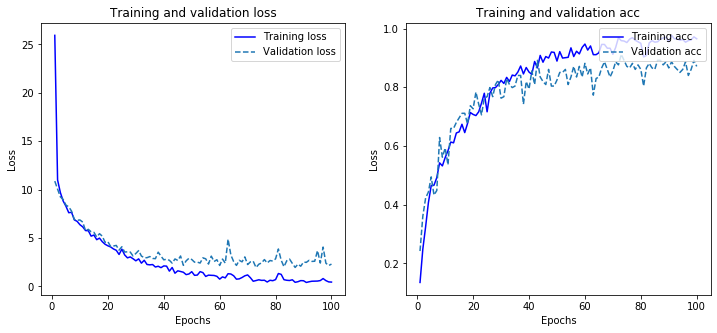

In [13]:
evaluate.plot_history(history)

#### Aplicăm și regularizare L2 pentru a vedea dacă apar îmbunătățiri:

In [14]:
modelReg = learn.build_regularized_CNN_model(num_rows, num_columns, num_labels)
learn.compile(modelReg)
reg_history= learn.train_model_class_weights(modelReg, result_sets, 
                                             num_epochs, num_batch_size, 'CNNCwReg', 'regularization', 'CNNCwReg', class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 776 samples, validate on 194 samples
Epoch 1/100
767/776 [============================>.] - ETA: 0s - loss: 19.9315 - accuracy: 0.1343- ETA: 0s - loss: 21.3280 - accuracy:
Epoch 00001: val_loss improved from inf to 12.26197, saving model to saved_models/weights.best.CNNCwReg.hdf5
776/776 [==============================] - 5s 7ms/sample - loss: 19.8398 - accuracy: 0.1340 - val_loss: 12.2620 - val_accuracy: 0.1649
Epoch 2/100
767/776 [============================>.] - ETA: 0s - loss: 11.9822 - accuracy: 0.2321
Epoch 00002: val_loss improved from 12.26197 to 11.54697, saving model to saved_models/weights.best.CNNCwReg.hdf5
776/776 [==============================] - 3s 4ms/sample - loss: 11.9497 - accuracy: 0.2332 - val_loss: 11.5470 - val_accuracy: 0.2835
Epoch 3/100
754/776 [============================>.] - ETA: 0s - loss: 10.7561 - accuracy: 0.3369
Epoch 00003: val_loss improved from 11.54697 to 10.36517, saving model to saved_

Epoch 26/100
767/776 [============================>.] - ETA: 0s - loss: 3.6376 - accuracy: 0.8240
Epoch 00026: val_loss did not improve from 4.28114
776/776 [==============================] - 4s 5ms/sample - loss: 3.6231 - accuracy: 0.8247 - val_loss: 4.6276 - val_accuracy: 0.8144
Epoch 27/100
767/776 [============================>.] - ETA: 0s - loss: 3.4989 - accuracy: 0.8136
Epoch 00027: val_loss did not improve from 4.28114
776/776 [==============================] - 4s 5ms/sample - loss: 3.4914 - accuracy: 0.8131 - val_loss: 4.8461 - val_accuracy: 0.7268
Epoch 28/100
767/776 [============================>.] - ETA: 0s - loss: 3.3441 - accuracy: 0.8279 ETA: 0s - loss: 3.298
Epoch 00028: val_loss did not improve from 4.28114
776/776 [==============================] - 4s 5ms/sample - loss: 3.3528 - accuracy: 0.8260 - val_loss: 4.9307 - val_accuracy: 0.7526
Epoch 29/100
767/776 [============================>.] - ETA: 0s - loss: 3.6848 - accuracy: 0.8149
Epoch 00029: val_loss did not impr

Epoch 54/100
767/776 [============================>.] - ETA: 0s - loss: 1.7779 - accuracy: 0.9166
Epoch 00054: val_loss did not improve from 3.36120
776/776 [==============================] - 3s 4ms/sample - loss: 1.7694 - accuracy: 0.9175 - val_loss: 3.4731 - val_accuracy: 0.8608
Epoch 55/100
767/776 [============================>.] - ETA: 0s - loss: 1.7103 - accuracy: 0.9205
Epoch 00055: val_loss did not improve from 3.36120
776/776 [==============================] - 3s 4ms/sample - loss: 1.7089 - accuracy: 0.9201 - val_loss: 3.5289 - val_accuracy: 0.8557
Epoch 56/100
767/776 [============================>.] - ETA: 0s - loss: 1.9911 - accuracy: 0.9179
Epoch 00056: val_loss did not improve from 3.36120
776/776 [==============================] - 3s 4ms/sample - loss: 1.9773 - accuracy: 0.9188 - val_loss: 3.5758 - val_accuracy: 0.8557
Epoch 57/100
767/776 [============================>.] - ETA: 0s - loss: 1.8724 - accuracy: 0.9348
Epoch 00057: val_loss did not improve from 3.36120
776/7

Epoch 83/100
767/776 [============================>.] - ETA: 0s - loss: 1.1923 - accuracy: 0.9635
Epoch 00083: val_loss did not improve from 2.95875
776/776 [==============================] - 4s 5ms/sample - loss: 1.2236 - accuracy: 0.9626 - val_loss: 3.1981 - val_accuracy: 0.8866
Epoch 84/100
767/776 [============================>.] - ETA: 0s - loss: 1.4157 - accuracy: 0.9387
Epoch 00084: val_loss did not improve from 2.95875
776/776 [==============================] - 4s 5ms/sample - loss: 1.4288 - accuracy: 0.9381 - val_loss: 3.9092 - val_accuracy: 0.8351
Epoch 85/100
767/776 [============================>.] - ETA: 0s - loss: 1.1172 - accuracy: 0.9700
Epoch 00085: val_loss did not improve from 2.95875
776/776 [==============================] - 4s 5ms/sample - loss: 1.1147 - accuracy: 0.9704 - val_loss: 3.8049 - val_accuracy: 0.8660
Epoch 86/100
767/776 [============================>.] - ETA: 0s - loss: 1.0622 - accuracy: 0.9700 E
Epoch 00086: val_loss did not improve from 2.95875
776

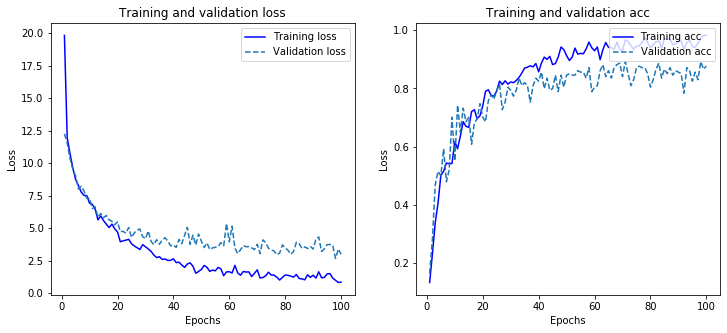

In [15]:
evaluate.plot_history(reg_history)

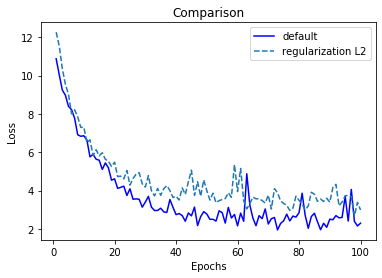

In [16]:
evaluate.plot_compared_val_loss(history, reg_history, 'default', 'regularization L2')
